<a href="https://colab.research.google.com/github/saeedrafieyan/SciDownl/blob/master/iris_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#import missingno as msno
#from sklearn.metrics import make_scorer, accuracy_score,precision_score
#from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score ,precision_score,recall_score,f1_score
from sklearn.model_selection import KFold,train_test_split,cross_val_score
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

import keras
from keras.datasets import mnist
from keras.models import Model
from keras.layers import Input, Dense,TimeDistributed
from keras.layers import LSTM

In [62]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive


Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive


In [63]:
import pandas as pd
iris = pd.read_csv('/gdrive/My Drive/dataset.csv')


In [64]:
X=iris.iloc[:,0:4].values
y=iris.iloc[:,4].values
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=0)


In [65]:
# Gaussian Naive Bayes

print ('*** Naive Bayes result ***')
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
Y_pred = gaussian.predict(X_test) 
accuracy_nb=round(accuracy_score(y_test,Y_pred)* 100, 2)
acc_gaussian = round(gaussian.score(X_train, y_train) * 100, 2)

cm = confusion_matrix(y_test, Y_pred)
accuracy = accuracy_score(y_test,Y_pred)
precision =precision_score(y_test, Y_pred,average='micro')
recall =  recall_score(y_test, Y_pred,average='micro')
f1 = f1_score(y_test,Y_pred,average='micro')
print('Confusion matrix for Naive Bayes\n',cm)
print('accuracy_Naive Bayes: %.3f' %accuracy)
print('precision_Naive Bayes: %.3f' %precision)
print('recall_Naive Bayes: %.3f' %recall)
print('f1-score_Naive Bayes : %.3f' %f1)

*** Naive Bayes result ***
Confusion matrix for Naive Bayes
 [[3 0 0]
 [0 8 0]
 [0 1 3]]
accuracy_Naive Bayes: 0.933
precision_Naive Bayes: 0.933
recall_Naive Bayes: 0.933
f1-score_Naive Bayes : 0.933


In [66]:
# SVM

print ('*** SVM result ***')
linear_svc = LinearSVC(max_iter=4000)
linear_svc.fit(X_train, y_train)
Y_pred = linear_svc.predict(X_test)
accuracy_svc=round(accuracy_score(y_test,Y_pred)* 100, 2)
acc_linear_svc = round(linear_svc.score(X_train, y_train) * 100, 2)

cm = confusion_matrix(y_test, Y_pred)
accuracy = accuracy_score(y_test,Y_pred)
precision =precision_score(y_test, Y_pred,average='micro')
recall =  recall_score(y_test, Y_pred,average='micro')
f1 = f1_score(y_test,Y_pred,average='micro')
print('Confusion matrix for SVC\n',cm)
print('accuracy_SVC: %.3f' %accuracy)
print('precision_SVC: %.3f' %precision)
print('recall_SVC: %.3f' %recall)
print('f1-score_SVC : %.3f' %f1)

*** SVM result ***
Confusion matrix for SVC
 [[3 0 0]
 [0 8 0]
 [0 0 4]]
accuracy_SVC: 1.000
precision_SVC: 1.000
recall_SVC: 1.000
f1-score_SVC : 1.000


In [67]:
#LSTM

batch_size = 32
num_classes = 10
epochs = 5
row_hidden = 128
col_hidden = 128
(x_train, y_train) , (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(x_train.shape[0],28,28,1)
x_test = x_test.reshape(x_test.shape[0],28,28,1)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0],'train sample')
print(x_test.shape[0], 'test sample')

x_train shape: (60000, 28, 28, 1)
60000 train sample
10000 test sample


In [68]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

row, col, pixel = x_train.shape[1:]

x = Input(shape=(row, col, pixel))

In [69]:
encoded_rows = TimeDistributed(LSTM(row_hidden))(x)
encoded_columns = LSTM(col_hidden)(encoded_rows)

In [70]:
prediction = Dense(num_classes,activation='softmax')(encoded_columns)
model = Model(x, prediction)
model.compile(loss='categorical_crossentropy',
              optimizer= 'rmsprop',
              metrics= ['accuracy'])

In [71]:
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose = 1,
          validation_data = (x_test, y_test))

Epoch 1/5
1875/1875 [==============================] - 23s 11ms/step - loss: 0.8525 - accuracy: 0.7032 - val_loss: 0.1275 - val_accuracy: 0.9592
Epoch 2/5
1875/1875 [==============================] - 20s 11ms/step - loss: 0.1206 - accuracy: 0.9626 - val_loss: 0.0825 - val_accuracy: 0.9743
Epoch 3/5
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0783 - accuracy: 0.9766 - val_loss: 0.1258 - val_accuracy: 0.9620
Epoch 4/5
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0604 - accuracy: 0.9808 - val_loss: 0.0519 - val_accuracy: 0.9817
Epoch 5/5
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0497 - accuracy: 0.9850 - val_loss: 0.0555 - val_accuracy: 0.9825


In [72]:
scores = model.evaluate(x_test, y_test, verbose=0)
print('test loss: ', scores[0])
print('test LSTM accuracy: ', scores[1])


test loss:  0.05545157939195633
test LSTM accuracy:  0.9825000166893005


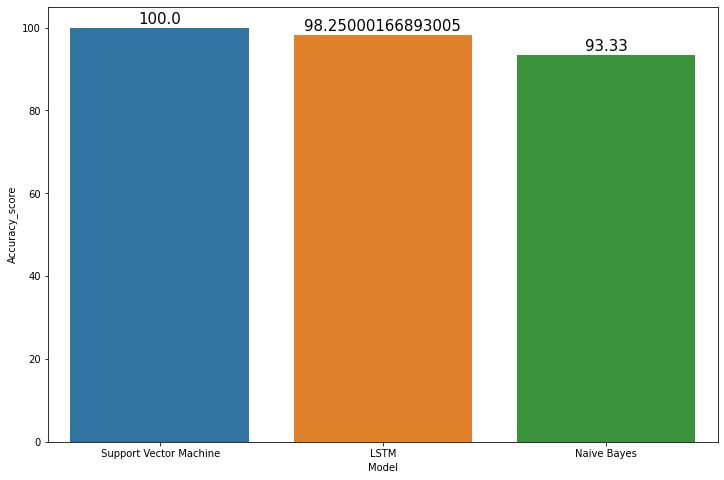

In [73]:
results = pd.DataFrame({
    'Model': [ 'Naive Bayes',  
              ' Support Vector Machine',
              'LSTM' 
              ],
    'Score': [acc_gaussian,  
              acc_linear_svc,
              scores[1],
              ],
    "Accuracy_score":[
                      accuracy_nb,
                      accuracy_svc,
                      scores[1]*100
                     ]})
result_df = results.sort_values(by='Accuracy_score', ascending=False)
result_df = result_df.reset_index(drop=True)
result_df.head(9)


plt.subplots(figsize=(12,8))
ax=sns.barplot(x='Model',y="Accuracy_score",data=result_df)
labels = (result_df["Accuracy_score"])
# add result numbers on barchart
for i, v in enumerate(labels):
    ax.text(i, v+1, str(v), horizontalalignment = 'center', size = 15, color = 'black')